/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

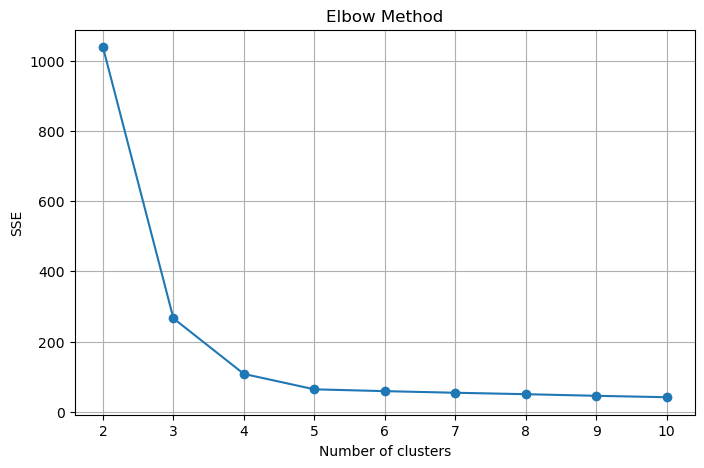

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

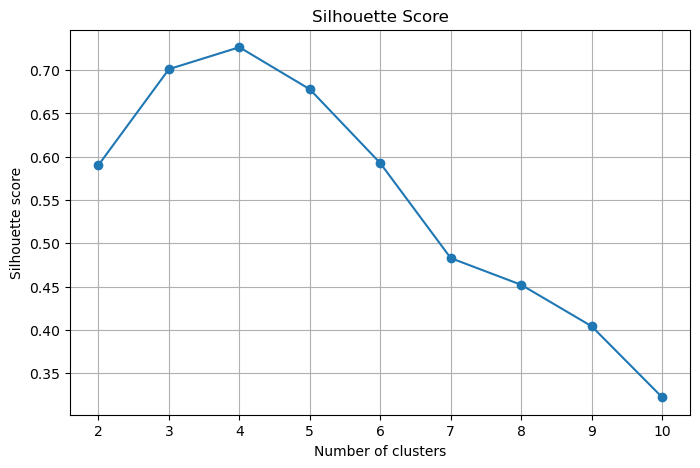

Optimal number of clusters (Elbow method): 2
Optimal number of clusters (Silhouette Score): 4


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=1000, centers=5, random_state=42)
#variables
xx = train[["Age","Sex","Pclass"]].values
kmeans = KMeans(init="random",n_clusters = 3,n_init = 10, max_iter = 300, random_state=42)
kmeans.fit(features)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('kmeans', KMeans(random_state=42))  # KMeans clustering
])

# Fit the pipeline to the data
pipeline.fit(X)

# Elbow Method: Calculate SSE for different number of clusters
sse = []
list_k = list(range(2, 11))
for k in list_k:
    pipeline.set_params(kmeans__n_clusters=k)
    pipeline.fit(X)
    sse.append(pipeline.named_steps['kmeans'].inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.xticks(list_k)
plt.grid(True)
plt.show()

# Silhouette Score: Calculate silhouette score for different number of clusters
silhouette_scores = []
for k in range(2, 11):
    pipeline.set_params(kmeans__n_clusters=k)
    pipeline.fit(X)
    labels = pipeline.predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

# Find the optimal number of clusters using the elbow method
optimal_num_clusters_elbow = np.argmin(np.diff(sse)) + 2
print("Optimal number of clusters (Elbow method):", optimal_num_clusters_elbow)

# Find the optimal number of clusters for Silhouette Score
optimal_num_clusters_silhouette = np.argmax(silhouette_scores) + 2
print("Optimal number of clusters (Silhouette Score):", optimal_num_clusters_silhouette)
